# Problem 1: Data from yFinance

## About the yFinance Python Library

yFinance is a popular Python library that provides easy access to Yahoo Finance data. It is a key tool for investors and data analysts, offering a user-friendly way to download comprehensive market data directly in Python.

Key Features:

1. Historical Data: Download OHLC (Open, High, Low, Close) prices and volume data.

2. Financial Statements: Access balance sheets, income statements, and cash flow statements.

3. Corporate Actions: Get data on stock splits and dividends.

4. Company Metrics: Includes key data like earnings dates and EPS.

5. Multiple Tickers: Download data for several stocks at once for portfolio analysis.

Source: [What is YFinance library?](#https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/)

## What is the FAANG Stock

FAANG is an acronym for five major American technology companies: Meta (formerly known as Facebook), Amazon, Apple, Netflix, and Alphabet (formarly known as Google).

These companies have a massive influence on the stock market and are part of major indices like the S&P 500. 

Source: [Investopedia](#https://www.investopedia.com/terms/f/faang-stocks.asp)


### Task 1: yFinance

Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

• Facebook (META)

• Apple (AAPL)

• Amazon (AMZN)

• Netflix (NFLX)

• Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds.

Create the data folder if you don't already have one.

Link for yfinance: https://github.com/ranaroussi/yfinance

### Importing all libraries

In [1]:
# Import Dates and Times
import datetime as dt

# Importing yfinance and getting the data ready to run
import yfinance as yf

# Importing Data Frames
import pandas as pd

In [2]:
# Defining FAANG Stock Tickers
tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

# 'F' in FAANG now stands for META (used to be Facebook)

In [3]:
# Downloading data for the required stocks (FAANG)
df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

/tmp/ipykernel_2894/3832998973.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL','AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


In [4]:
# Current date and time
now = dt.datetime.now()

# Source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [5]:
# Save the data frame to CSV
now= dt.datetime.now()

# Source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# Creating the filename (and add formatting date and time) 
filename = now.strftime("%Y%m%d-%H%M%S") + ".csv"

# Save data to CSV File
df.to_csv(filename)


Problem 2: Plotting Data
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [6]:
import matplotlib as plot

<Axes: xlabel='Datetime'>

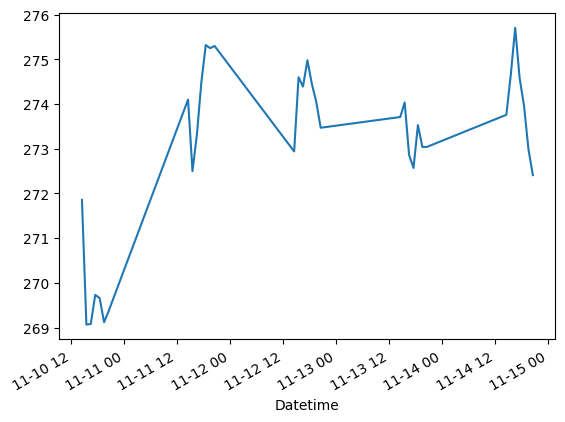

In [7]:
df[('Close', 'AAPL')].plot()

Problem 3: Script
Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

Problem 4: Automation
Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.